In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df=pd.read_csv('/content/house_price_regression_dataset (1).csv')
df.head()


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [9]:
df['m2'] = df['Square_Footage']*0.0929030

#Convert square footage (ft²) to square meters (m²),

df = df.drop("Square_Footage", axis=1)

# Drop footage

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Num_Bedrooms          1000 non-null   int64  
 1   Num_Bathrooms         1000 non-null   int64  
 2   Year_Built            1000 non-null   int64  
 3   Lot_Size              1000 non-null   float64
 4   Garage_Size           1000 non-null   int64  
 5   Neighborhood_Quality  1000 non-null   int64  
 6   House_Price           1000 non-null   float64
 7   m2                    1000 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 62.6 KB


In [11]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Num_Bedrooms,1000.0,2.990000,1.427564,1.000000,2.000000,3.000000,4.000000,5.000000e+00
Num_Bathrooms,1000.0,1.973000,0.820332,1.000000,1.000000,2.000000,3.000000,3.000000e+00
Year_Built,1000.0,1986.550000,20.632916,1950.000000,1969.000000,1986.000000,2004.250000,2.022000e+03
Lot_Size,1000.0,2.778087,1.297903,0.506058,1.665946,2.809740,3.923317,4.989303e+00
Garage_Size,1000.0,1.022000,0.814973,0.000000,0.000000,1.000000,2.000000,2.000000e+00
Neighborhood_Quality,1000.0,5.615000,2.887059,1.000000,3.000000,6.000000,8.000000,1.000000e+01
House_Price,1000.0,618861.018647,253568.058375,111626.853424,401648.228909,628267.291129,827141.277637,1.108237e+06
m2,1000.0,261.561150,116.641103,46.730209,162.533798,265.934838,357.630099,4.644221e+02


<Axes: >

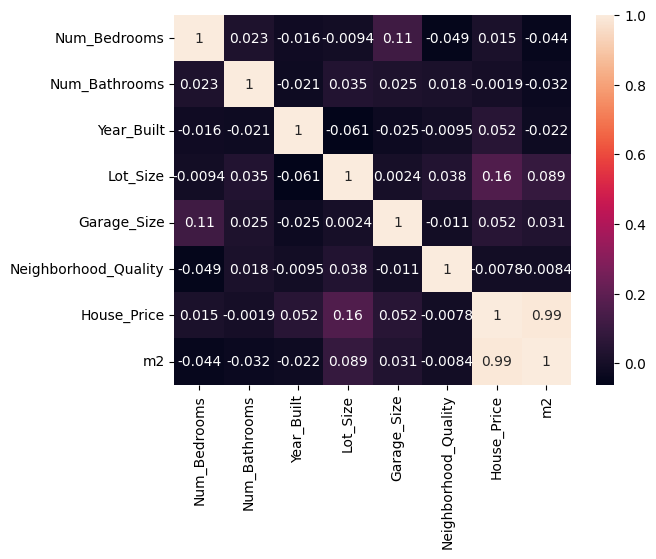

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
cats=df.loc[:,['Num_Bedrooms','Num_Bathrooms','Garage_Size']]


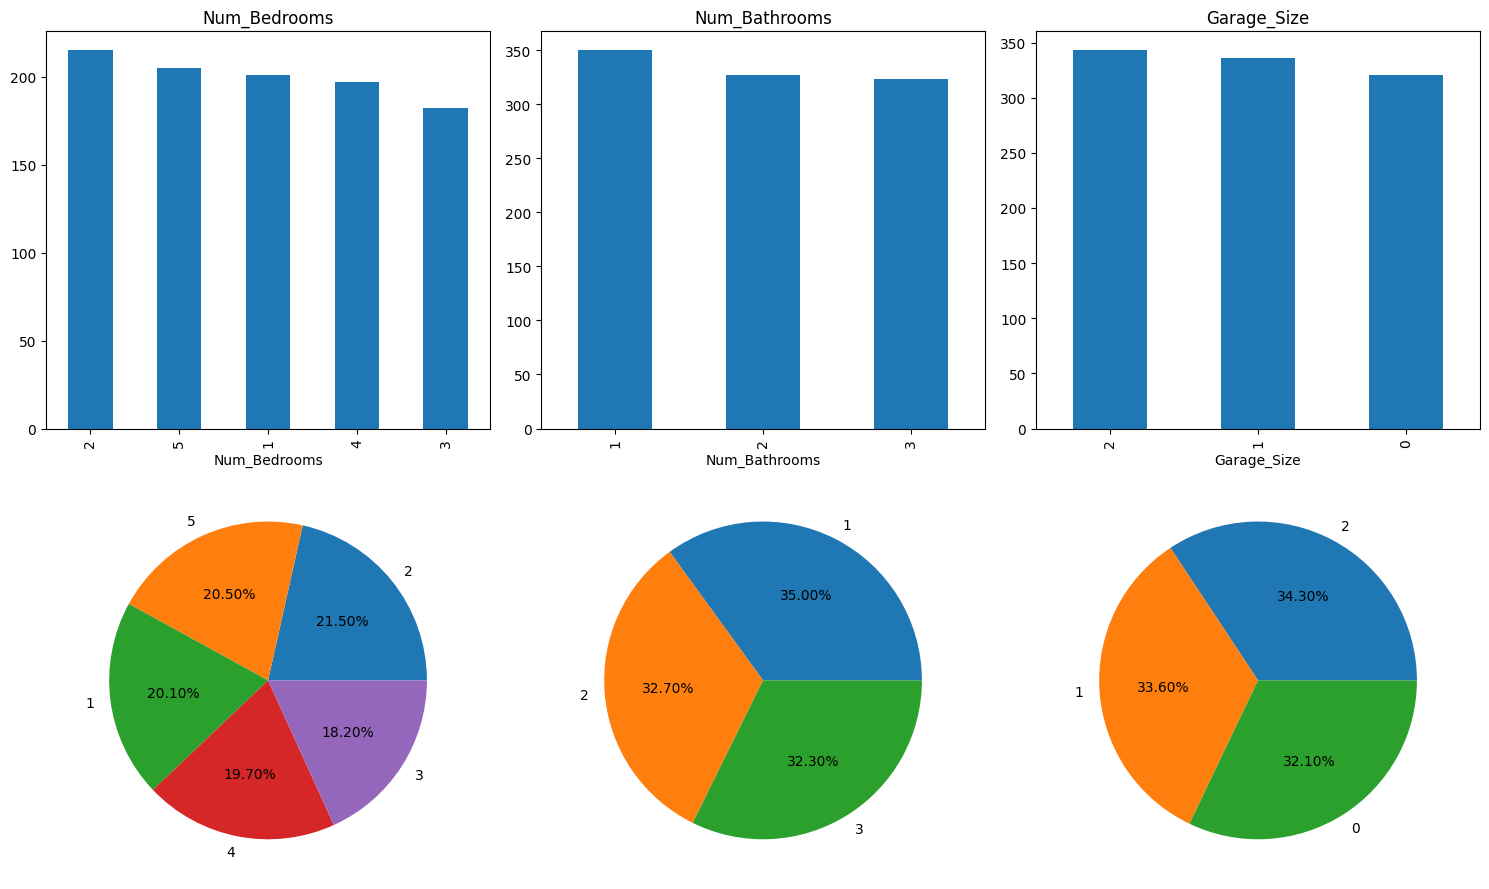

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))

for i, j in enumerate(cats):
    index = 0
    count = df[j].value_counts()
    count.plot(kind="bar", ax=axes[index][i])
    axes[index][i].set_title(j)

    index += 1

    count.plot(kind="pie", ax=axes[index][i], autopct="%0.2f%%")
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")
    axes[index][i].set_title("")

plt.tight_layout()
plt.show()


In [15]:
df.columns


Index(['Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Lot_Size',
       'Garage_Size', 'Neighborhood_Quality', 'House_Price', 'm2'],
      dtype='object')

<Axes: xlabel='m2', ylabel='House_Price'>

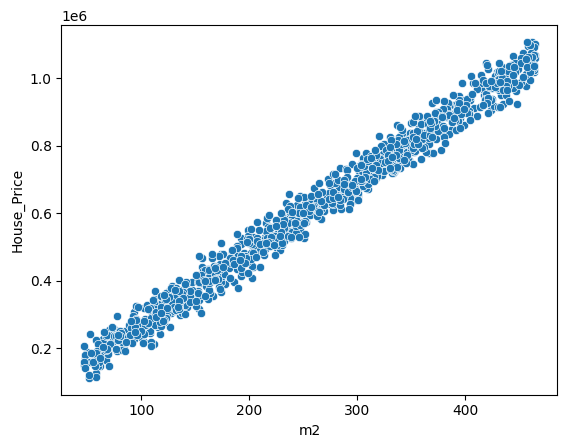

In [16]:
sns.scatterplot(df,x='m2',y='House_Price')


In [17]:
df.isna().sum()


,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0
m2,0


<Axes: xlabel='m2'>

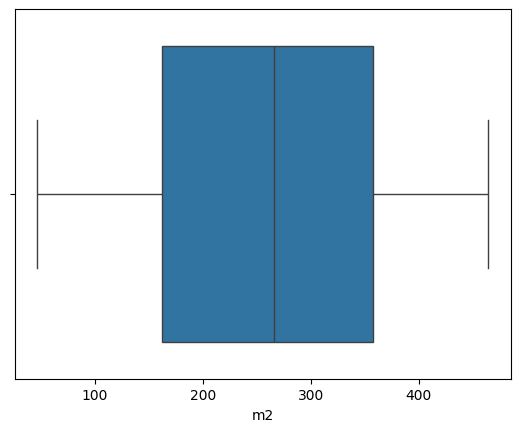

In [18]:
sns.boxplot(df,x='m2')


In [19]:
q1=df.quantile(.25)
q3=df.quantile(.75)
IQR=q3-q1
LowerBound=q1-1.5*IQR
UpperBound=q3+1.5*IQR
df=df[(df>LowerBound)&(df<UpperBound)]


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Num_Bedrooms          1000 non-null   int64  
 1   Num_Bathrooms         1000 non-null   int64  
 2   Year_Built            1000 non-null   int64  
 3   Lot_Size              1000 non-null   float64
 4   Garage_Size           1000 non-null   int64  
 5   Neighborhood_Quality  1000 non-null   int64  
 6   House_Price           1000 non-null   float64
 7   m2                    1000 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 62.6 KB


In [21]:
X=df.drop(['House_Price'],axis=1)
y=df['House_Price']


In [22]:
from sklearn.model_selection import train_test_split


In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.7,random_state=12)


In [24]:
X_train


,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,m2
834,1,3,1999,3.435059,1,1,391.957757
227,1,2,1957,4.595959,1,6,463.864679
471,1,1,1955,4.962632,0,7,347.085608
929,4,2,1974,2.644076,0,8,113.527466
457,1,1,1987,2.076860,0,1,352.473982
...,...,...,...,...,...,...,...
241,3,2,2006,4.620525,2,5,277.315455
253,2,3,1981,1.402488,2,10,366.409432
390,3,1,2008,4.660351,1,5,453.366640
667,4,3,2019,1.448988,0,6,95.225575


In [25]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge, TheilSenRegressor,RANSACRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
from scipy.stats import spearmanr


In [27]:
# Method to train , test the model and return metrics results
def get_model_result(model):
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end = time.time()
    r2 = r2_score(y_test, y_pred)* 100
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mse = mean_squared_error(y_test, y_pred)
    spearman_corr, _ = spearmanr(y_test, y_pred)
    spearman_corr=spearman_corr*100
    pearson_corr, _ = pearsonr(y_test, y_pred)
    pearson_corr=spearman_corr*100

    return {
        "R-squared %": r2, "RMSE": rmse, "MSE": mse, "Pearson Correlation%": pearson_corr,
        "Spearman Correlation$": spearman_corr, "Time (s)": end - start
    }



In [29]:
# Method to train , test the model and return metrics results
def get_model_result(model):
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end = time.time()
    r2 = r2_score(y_test, y_pred)* 100
    # Calculate RMSE without 'squared' argument, then take the square root
    mse = mean_squared_error(y_test, y_pred)  # Calculate MSE first
    rmse = np.sqrt(mse)  # Then calculate RMSE by taking the square root

    #rmse = mean_squared_error(y_test, y_pred, squared=False) #This line is causing the error.
    #mse = mean_squared_error(y_test, y_pred)
    spearman_corr, _ = spearmanr(y_test, y_pred)
    spearman_corr=spearman_corr*100
    pearson_corr, _ = pearsonr(y_test, y_pred)
    pearson_corr=spearman_corr*100

    return {
        "R-squared %": r2, "RMSE": rmse, "MSE": mse, "Pearson Correlation%": pearson_corr,
        "Spearman Correlation$": spearman_corr, "Time (s)": end - start
    }


In [30]:
# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Display the results table
results_df.T


""


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

In [31]:
# Function to get the model result using GridSearch
def get_model_result_with_gridsearch(model, param_grid):
    start = time.time()

    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    end = time.time()

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)* 100
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    spearman_corr, _ = spearmanr(y_test, y_pred)
    spearman_corr=spearman_corr*100
    pearson_corr, _ = pearsonr(y_test, y_pred)
    pearson_corr=spearman_corr*100
    return {"Best Params":grid_search.best_params_,"R-squared %": r2, "RMSE": rmse, "MSE": mse, "Pearson Correlation %": pearson_corr,
            "Spearman Correlation %": spearman_corr, "Time (s)": end - start}

In [32]:
# Model definitions and their respective param grids
optimized_results = {}

# Linear Regression
print("Tuning Linear Regression")
optimized_results["Linear Regression"] = get_model_result_with_gridsearch(LinearRegression(), {'fit_intercept': [True, False], 'copy_X': [True, False], 'positive': [True, False]})

# Random Forest
print("Tuning Random Forest Regressor")
optimized_results["Random Forest"] = get_model_result_with_gridsearch(RandomForestRegressor(),
    {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]})
# TheilSen Regressor
print("Tuning TheilSen Regressor")
optimized_results["TheilSen Regressor"] = get_model_result_with_gridsearch(TheilSenRegressor(random_state=0),
{'fit_intercept': [True, False], 'max_subpopulation': [10, 1000]})

# RANSAC Regressor
print("Tuning RANSAC Regressor")
optimized_results["RANSAC Regressor"] = get_model_result_with_gridsearch(RANSACRegressor(),
    {'estimator': [LinearRegression(), DecisionTreeRegressor()], 'min_samples': [0.5, 0.7]})

# Decision Tree
print("Tuning Decision Tree Regressor")
optimized_results["Decision Tree"] = get_model_result_with_gridsearch(DecisionTreeRegressor(),
    {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]})

# AdaBoost
print("Tuning AdaBoost Regressor")
optimized_results["AdaBoost"] = get_model_result_with_gridsearch(AdaBoostRegressor(),
    {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]})

# Bayesian Ridge Regression
print("Tuning Bayesian Ridge")
optimized_results["Bayesian Ridge Regression"] = get_model_result_with_gridsearch(BayesianRidge(),
    {'alpha_1': [1e-6, 1e-5, 1e-4], 'alpha_2': [1e-6, 1e-5, 1e-4]})

# Gradient Boosting
print("Tuning Gradient Boosting Regressor")
optimized_results["Gradient Boosting"] = get_model_result_with_gridsearch(GradientBoostingRegressor(),
    {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]})

# K-Neighbors Regressor
print("Tuning K-Neighbors Regressor")
optimized_results["K-Neighbors Regressor"] = get_model_result_with_gridsearch(KNeighborsRegressor(),
    {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree']})

# Support Vector Regressor (SVR)
print("Tuning SVR")
optimized_results["SVR"] = get_model_result_with_gridsearch(SVR(),
    {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.2], 'kernel': ['linear', 'rbf']})


Tuning Linear Regression
Tuning Random Forest Regressor
Tuning TheilSen Regressor


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_theil_sen.py:128: ConvergenceWarning: Maximum number of iterations 300 reached in spatial median for TheilSen regressor.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_theil_sen.py:128: ConvergenceWarning: Maximum number of iterations 300 reached in spatial median for TheilSen regressor.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_theil_sen.py:128: ConvergenceWarning: Maximum number of iterations 300 reached in spatial median for TheilSen regressor.
  warnings.warn(


Tuning RANSAC Regressor
Tuning Decision Tree Regressor
Tuning AdaBoost Regressor
Tuning Bayesian Ridge
Tuning Gradient Boosting Regressor
Tuning K-Neighbors Regressor
Tuning SVR


In [33]:
optimized_results_df = pd.DataFrame(optimized_results)

# Display the results table
optimized_results_df.T

,Best Params,R-squared %,RMSE,MSE,Pearson Correlation %,Spearman Correlation %,Time (s)
Linear Regression,"{'copy_X': True, 'fit_intercept': True, 'posit...",99.836694,9964.124492,99283776.883244,9988.84432,99.888443,0.252831
Random Forest,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",99.300716,20618.84988,425136970.384894,9962.719586,99.627196,71.659377
TheilSen Regressor,"{'fit_intercept': True, 'max_subpopulation': 1...",99.838732,9901.742644,98044507.38598,9989.537662,99.895377,1.159776
RANSAC Regressor,"{'estimator': LinearRegression(), 'min_samples...",99.836694,9964.124492,99283776.883244,9988.84432,99.888443,0.315243
Decision Tree,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",98.646094,28690.097212,823121678.025152,9933.232416,99.332324,1.644996
AdaBoost,"{'learning_rate': 1.0, 'n_estimators': 200}",98.436198,30833.909603,950729981.380765,9942.275621,99.422756,14.879065
Bayesian Ridge Regression,"{'alpha_1': 0.0001, 'alpha_2': 1e-06}",99.836488,9970.404511,99408966.116358,9988.746542,99.887465,0.254855
Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",99.666627,14236.49693,202677844.844782,9981.29757,99.812976,31.038076
K-Neighbors Regressor,"{'algorithm': 'auto', 'n_neighbors': 10, 'weig...",98.540474,29788.157763,887334342.939394,9923.821376,99.238214,0.639014
SVR,"{'C': 10, 'epsilon': 0.2, 'kernel': 'linear'}",99.263533,21159.930274,447742649.185941,9958.541762,99.585418,2.546517


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Time (s)']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Time (s)'}, axis=1)
              .sort_values('Time (s)', ascending=True))
  xs = counted['Time (s)']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Time (s)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time (s)')
_ = plt.ylabel('count()')